#Proyecto final Métodos Computacionales: Vaciado de tanques
###_Santiago Berrío Londoño_    1000569865
###_Ricardo Moran_   71385223
###_Johana Marcela Vega_    1049654027

In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#  Vaciado de tanques.

Partiendo del volumen $V_o$ común a tres formas geométricas (Cilídrica, Cilíndrica horizontal y Cónica inversa), se estudia el vaciado de tanques, teniendo en cuenta la variacion del nivel de un liquido $h$ con respecto al tiempo $t$. Empleando  diferentes metodos computacionales. \
\
La ecuación diferencial que modela el vaciodo de un tanque es:


$$ \frac{dQ}{dt} = - kAv $$




## Con cilindro parado.

$$ \frac{dh}{dt} = -\frac{kA \sqrt[]{2gh}}{a} $$

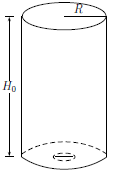\
a = área transversal del cilindro\
A = área del orificio \
h = altura del liquido

In [2]:
def func(h,t):
    g = 9.8
    a = (5)**2 * np.pi
    k = .6
    v = np.sqrt(2*g*h)
    A = (.5)**2 * np.pi
    dhdt = (-k*A*v)/a
    return(dhdt)

<ipython-input-2-defbbfccf819>:5: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(2*g*h)
/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


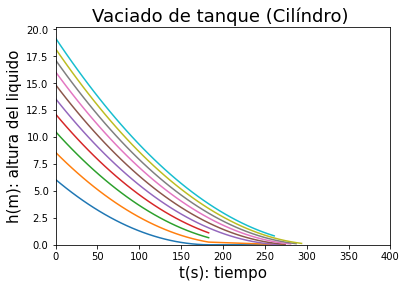

In [3]:
t = np.linspace(0,320)
h2 = list(range(1,11,1))
h1 = []
for i in h2:
    h1.append(round((2*np.sqrt(2*i*6)*11)/(np.pi*4),2))

h0 = 2.2053155816871683
t2 = []
c2 = []
for j in h1:
    c = integrate.odeint(func,j,t)
    cnew = []
    tnew = []
    for i in range(len(c)):
        if c[i][0] <= j:# and c[i][0] != 'nan':
            if cnew != []: 
                if c[i][0] < cnew[-1] and c[i][0] != cnew[-1]:
                    cnew.append(c[i][0])
                    tnew.append(t[i])
            else: 
                cnew.append(c[i][0])
                tnew.append(t[i])
    c2.append(cnew)
    t2.append(tnew)

    plt.plot(tnew,cnew)
    plt.xlim(0,400)
    plt.ylim(0,max(h1)+1)
    plt.title('Vaciado de tanque (Cilíndro) ', fontsize = 18)
    plt.xlabel("t(s): tiempo", fontsize = 15) 
    plt.ylabel("h(m): altura del liquido" , fontsize = 15)
# integrate.odeint(func,1,t)
2**2*np.pi* 2.2053155816871683
v1 = f'hmin {min(cnew)}, tmax {max(tnew)}'

## Cilindro dispuesto horizontalmente

$$ \frac{dh}{dt} = -\frac{kA\sqrt[]{2gh}}{2\sqrt[]{2hR-h^2}Ho} $$

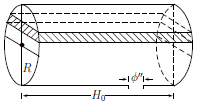\
A: área del orificio\
h: altura del liquido\
R: radio del cilindro\
Ho: largo del cilindro

In [4]:
def func2(h,t):
    g = 9.8
    R = 6
    k = .6
    Ho = 11
    #a = Ho * 2 * R
    v = np.sqrt(2*g*h)
    A = (.5)**2 * np.pi
    dhdt = (-k*A*v)/(2*np.sqrt(2*h*R-h**2)*Ho)
    #print((2*np.sqrt(2*R*1-1**2)*Ho)/(np.pi*R**2))
    return(dhdt)
func2(1,10)
2*np.sqrt(2*2*1-1**2)*8*1
t = np.linspace(0,360,720)

<ipython-input-4-b7c3b7919e24>:7: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(2*g*h)
<ipython-input-4-b7c3b7919e24>:9: RuntimeWarning: invalid value encountered in sqrt
  dhdt = (-k*A*v)/(2*np.sqrt(2*h*R-h**2)*Ho)


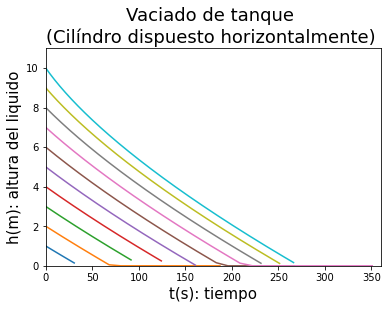

In [5]:


h0 = 1

for j in h2:
    c = integrate.odeint(func2,j,t)
    cnew = []
    tnew = []
    for i in range(len(c)):
        if c[i][0] <= j and c[i][0] <= c[i-1][0] and c[i][0] != c[i-1][0]:# and c[i][0] != 'nan':
            if cnew != []: 
                if c[i][0] < cnew[-1] and c[i][0] != cnew[-1]:
                    cnew.append(c[i][0])
                    tnew.append(t[i])
            else: 
                cnew.append(c[i][0])
                tnew.append(t[i])
    plt.plot(tnew,cnew)
    plt.xlim(0,360)
    plt.ylim(0,max(h2)+1)
    plt.title('Vaciado de tanque \n(Cilíndro dispuesto horizontalmente) ', fontsize = 18)
    plt.xlabel("t(s): tiempo", fontsize = 15) 
    plt.ylabel("h(m): altura del liquido" , fontsize = 15)   
v2 = f'hmin {min(cnew)}, tmax {max(tnew)}'
# integrate.odeint(func,1,t)

## Cono circular invertido

$$ \frac{dh}{dt} = -\frac{kA\sqrt[]{2gh}Ho}{πR^2h^2} $$

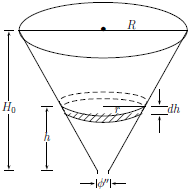\
A: área del arificio\
h: altura variable\
R: radio de la base del cono\
Ho: altura del cono

In [7]:
def func3(h,t):
    g = 9.8
    R = 5
    k = .6
    Ho = 3*max(h1)
    v = np.sqrt(2*g*h)
    A = (.5)**2 * np.pi
    dhdt = (-k*A*v*Ho)/(np.pi*R**2*h**2)
    #print(h[0])
    return(dhdt)
#2*np.sqrt(2*2*1-1**2)*8*1 # h

<ipython-input-7-a7b9ce3dc72b>:6: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(2*g*h)


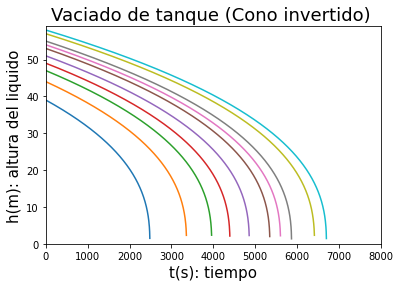

In [8]:
t = np.linspace(0,8000,3600)
h0 = 3*2.2053155816871683
Ho = 3*max(h1)
h3 = []
for i in h1:
    h3.append(round((3*Ho**2*i)**(1/3)))
for j in h3:
    c = integrate.odeint(func3,j,t)
    cnew = []
    tnew = []
    for i in range(len(c)):
        if c[i][0] <= j and c[i][0] < c[i-1][0] and c[i][0] != c[i-1][0]:# and c[i][0] != 'nan':
            if cnew != []: 
                if c[i][0] < cnew[-1] and c[i][0] != cnew[-1]:
                    cnew.append(c[i][0])
                    tnew.append(t[i])
            else: 
                cnew.append(c[i][0])
                tnew.append(t[i])
    plt.plot(tnew,cnew)
    plt.xlim(0,8000)
    plt.ylim(0,max(h3)+1)
    plt.title('Vaciado de tanque (Cono invertido) ', fontsize = 18)
    plt.xlabel("t(s): tiempo", fontsize = 15) 
    plt.ylabel("h(m): altura del liquido" , fontsize = 15)
v3 = f'hmin {min(cnew)}, tmax {max(tnew)}'

In [9]:
Vo = []
for i in h1:
    Vo.append(round(np.pi * 5**2 *i,2))
o = r'Volumenes~iniciales'
display(Latex(f'{o}: {Vo}'))
h3

<IPython.core.display.Latex object>

[39, 44, 47, 49, 51, 53, 54, 55, 57, 58]

In [10]:
#print(f'{v1}\n{v2}\n{v3}')

#Conclusiones



*   Durante el estudio de vaciado de tanques de las geometrías propuestas, se puede concluir la velocidad
 del vaciado del volumen de un liquido, esta sujeto a diferentes variables como son: la posición del tanque, la geometría del escape, la densidad liquido y la geometría del tanque. 

*   En nuestro caso estudiamos el vaciado de acuerdo a volumenes iniciales constantes para tres geometrías propuestas, de las cuales se observó lo siguiente:

El tanque cilíndrico en posición vertical muestra una vaciado desacelerado, más eficiente con respecto a los otros dos tanques.

El tanque cilíndrico dispuesto horizontalmente muestra un vaciado con desaceleración mas lenta que el vertical a pesar de que poseen las mismas dimensiones, esto se debe a la posición en que se encuentra.

El tanque cónico invertido muestra un vaciado acelerado, menos eficiente con respecto a los dos iniciales, esto se debe a su geometría.




